In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import collections

# Import Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1AHCJI2Tb2jz5Z_9O5LsnOCkaWGDxcpuy \
      -O "/tmp/cats-and-dogs.zip"

Downloading...
From: https://drive.google.com/uc?id=1AHCJI2Tb2jz5Z_9O5LsnOCkaWGDxcpuy
To: /tmp/cats-and-dogs.zip
100% 853M/853M [00:07<00:00, 111MB/s]


# Unzip Dataset

In [ ]:
!unzip -u "/tmp/cats-and-dogs.zip" -d "/tmp"
try:
  os.mkdir('/tmp/PetImages')
except OSError:
  print("Kamu sudah buat directorinya")
!unzip -u "/tmp/train.zip" -d "/tmp/PetImages"
!unzip -u "/tmp/test.zip" -d "/tmp/PetImages"

In [ ]:
source_path = '/tmp/PetImages'
source_path_train = os.path.join(source_path, 'train')
print(f"There are {len(os.listdir(source_path_train))} images of train")

There are 25000 images of train


# Organize Images

In [ ]:
# mengorganize image pada train
def organize_img(path_train):
  mappings_file = collections.defaultdict()

  for filename in os.listdir(path_train):
      type_img = filename.split('.')[0]
      mappings_file.setdefault(type_img, []).append(filename)
  # print(mappings_file.items())
  for name_dir, Item_dir in mappings_file.items():
      folder_path = os.path.join(path_train, name_dir)
      if not os.path.exists(folder_path):
          os.mkdir(folder_path)
      
      for item in Item_dir:
          source = os.path.join(path_train, item)
          destination_dir = os.path.join(folder_path, item)
          print(f"memindahkan {source} ke {destination_dir}")
          os.rename(source, destination_dir)

In [ ]:
organize_img(source_path_train)

In [ ]:
source_path_dogs = os.path.join(source_path_train, 'dog')
source_path_cats = os.path.join(source_path_train,'cat')

print(f'jumlah gambar anjing: {len(os.listdir(source_path_dogs))}')
print(f'jumlah gambar kucing: {len(os.listdir(source_path_cats))}')

jumlah gambar anjing: 12500
jumlah gambar kucing: 12500


# Membuat directory untuk split dataset

In [ ]:
root_dir = '/tmp/cats-v-dogs'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
  except OSError:
      print("Kamu udah buat directory ini")

try:
  create_train_test_dirs(root_dir)
except FileExistsError:
  print("Anda seharusnya tidak melihat ini karena direktori atas telah dihapus sebelumnya")

In [ ]:
# check folder yang telah dibuat
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/testing/dogs
/tmp/cats-v-dogs/testing/cats


# Split Dataset

In [ ]:
def split_data(source, training, testing, split_size):
  files = []
  for name_file in os.listdir(source):
    path_f = source+name_file
    if os.path.getsize(path_f):
      files.append(name_file)
    else:
      print(f'{name_file} is zero length, so ignoring')
  n_files = len(files)
  split_point = int(n_files*split_size)
  shuffled = random.sample(files, n_files)

  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]

  for file_name in train_set:
    copyfile(source+file_name, training+file_name)

  for file_name in test_set:
    copyfile(source+file_name, testing+file_name)

In [ ]:
CAT_SOURCE_DIR = "/tmp/PetImages/train/cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/train/dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [ ]:
# memeriksa hasil splitting data
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")



There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


# Prepare Dataset

In [ ]:
def train_val_generators(training_dir, validation_dir):
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150,150))
  validation_datagen = ImageDataGenerator(rescale=1/255)
  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150,150))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Arsitektur model

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 37, 37, 64)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# Train Model

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
225/225 [==============================] - 164s 724ms/step - loss: 1.0039 - accuracy: 0.5674 - val_loss: 0.6326 - val_accuracy: 0.6088
Epoch 2/15
225/225 [==============================] - 163s 724ms/step - loss: 0.6477 - accuracy: 0.6408 - val_loss: 0.5565 - val_accuracy: 0.7044
Epoch 3/15
225/225 [==============================] - 163s 726ms/step - loss: 0.5942 - accuracy: 0.6849 - val_loss: 0.5109 - val_accuracy: 0.7492
Epoch 4/15
225/225 [==============================] - 162s 721ms/step - loss: 0.5594 - accuracy: 0.7128 - val_loss: 0.4979 - val_accuracy: 0.7652
Epoch 5/15
225/225 [==============================] - 163s 724ms/step - loss: 0.5396 - accuracy: 0.7330 - val_loss: 0.4752 - val_accuracy: 0.7856
Epoch 6/15
225/225 [==============================] - 163s 723ms/step - loss: 0.5184 - accuracy: 0.7447 - val_loss: 0.5035 - val_accuracy: 0.7628
Epoch 7/15
225/225 [==============================] - 162s 719ms/step - loss: 0.5008 - accuracy: 0.7584 - val_loss: 0.3940 -

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r-', label='Training Loss')
  plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

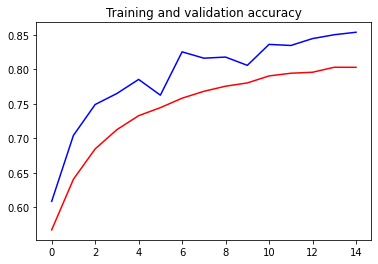

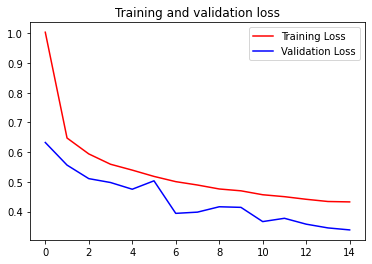

In [ ]:
plot_loss_acc(history)

# Uji Coba Model

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  print(path)
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " ini adalah gambar anjing")
  else:
    print(fn + " ini adalah gambar kucing")

# Save Model

In [ ]:
model.save('my_model.h5')